In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv("dataset1.csv")
df.drop('url', axis=1, inplace=True)
df.head()

,Links_in_tags,Abnormal_URL,Submitting_to_email,SFH,Iframe,popUpWidnow,on_mouseover,RightClick,Redirect,Result
0,0,-1,1,1,-1,1,1,1,-1,1
1,1,-1,1,1,-1,1,1,1,-1,1
2,1,-1,1,1,-1,1,1,1,0,1
3,-1,-1,1,-1,1,-1,-1,-1,-1,-1
4,0,-1,1,-1,1,-1,-1,-1,-1,-1


In [58]:
df.columns

Index(['Links_in_tags', 'Abnormal_URL', 'Submitting_to_email', 'SFH', 'Iframe',
       'popUpWidnow', 'on_mouseover', 'RightClick', 'Redirect', 'Result'],
      dtype='object')

In [59]:
df.shape

(11054, 10)

In [60]:
df.isnull().sum()

Links_in_tags          0
Abnormal_URL           0
Submitting_to_email    0
SFH                    0
Iframe                 0
popUpWidnow            0
on_mouseover           0
RightClick             0
Redirect               0
Result                 0
dtype: int64

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score

In [62]:
X= df.drop(columns='Result')
X.head()

,Links_in_tags,Abnormal_URL,Submitting_to_email,SFH,Iframe,popUpWidnow,on_mouseover,RightClick,Redirect
0,0,-1,1,1,-1,1,1,1,-1
1,1,-1,1,1,-1,1,1,1,-1
2,1,-1,1,1,-1,1,1,1,0
3,-1,-1,1,-1,1,-1,-1,-1,-1
4,0,-1,1,-1,1,-1,-1,-1,-1


In [63]:
Y=df['Result']
Y=pd.DataFrame(Y)
Y.head()

,Result
0,1
1,1
2,1
3,-1
4,-1


In [64]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2,random_state=2)

In [65]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [67]:
logreg_predict= model_1.predict(test_X)

In [68]:
accuracy_score(logreg_predict,test_Y)

0.8462234283129806

In [69]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.80      0.89      0.84      1034
           1       0.89      0.81      0.85      1177

    accuracy                           0.85      2211
   macro avg       0.85      0.85      0.85      2211
weighted avg       0.85      0.85      0.85      2211



In [70]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

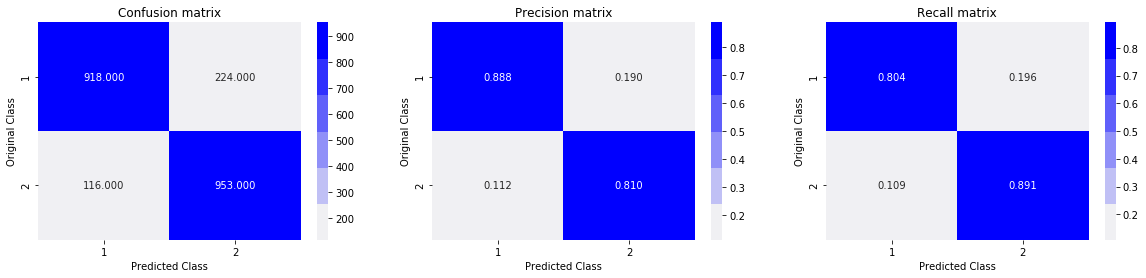

In [71]:
plot_confusion_matrix(test_Y, logreg_predict)

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [74]:
dtree_predict=model_3.predict(test_X)

In [75]:
accuracy_score(dtree_predict,test_Y)

0.8475802804161013

In [76]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.81      0.89      0.85      1045
           1       0.89      0.81      0.85      1166

    accuracy                           0.85      2211
   macro avg       0.85      0.85      0.85      2211
weighted avg       0.85      0.85      0.85      2211



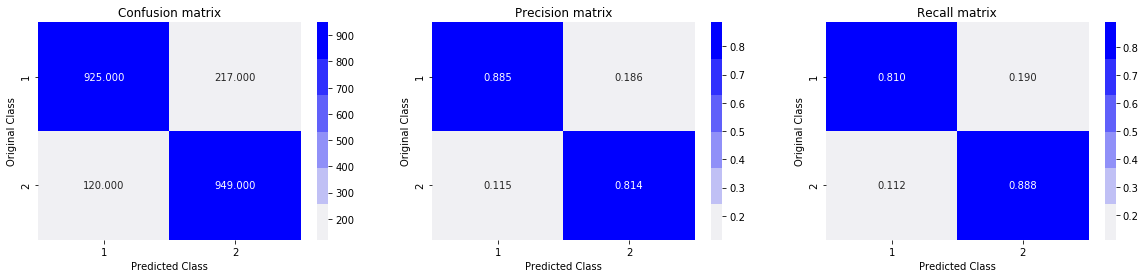

In [77]:
plot_confusion_matrix(test_Y, dtree_predict)

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [80]:


rfc_predict=model_4.predict(test_X)


In [81]:
accuracy_score(rfc_predict,test_Y)

0.8475802804161013

In [82]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.81      0.89      0.85      1045
           1       0.89      0.81      0.85      1166

    accuracy                           0.85      2211
   macro avg       0.85      0.85      0.85      2211
weighted avg       0.85      0.85      0.85      2211



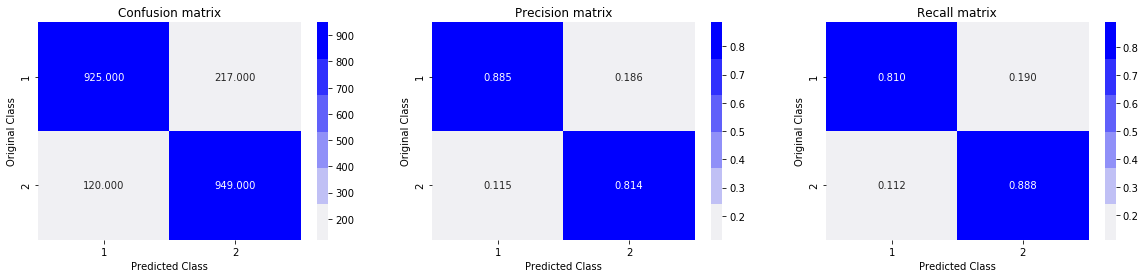

In [83]:
plot_confusion_matrix(test_Y, rfc_predict)

In [84]:
from sklearn.svm import SVC

In [85]:
svc=SVC()
model_5=svc.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [86]:
svm_predict=model_5.predict(test_X)

In [87]:
accuracy_score(svm_predict,test_Y)

0.8448665762098598

In [88]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.92      0.81      0.86      1309
           1       0.76      0.90      0.83       902

    accuracy                           0.84      2211
   macro avg       0.84      0.85      0.84      2211
weighted avg       0.86      0.84      0.85      2211



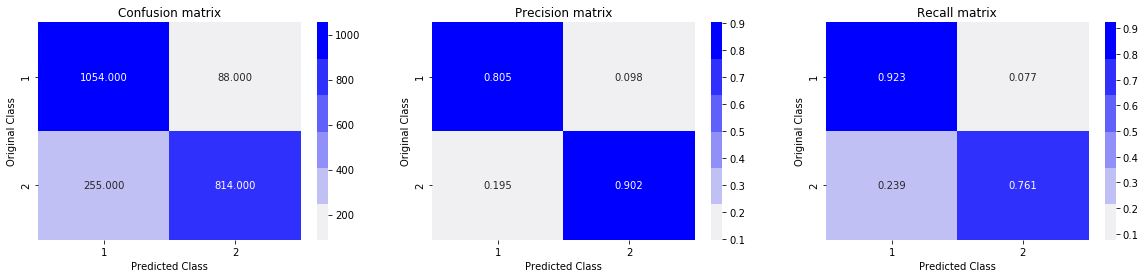

In [89]:
plot_confusion_matrix(test_Y, svm_predict)

In [90]:
from sklearn.ensemble import AdaBoostClassifier

In [91]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [92]:
adc_predict=model_6.predict(test_X)

In [93]:
accuracy_score(adc_predict,test_Y)

0.835820895522388

In [94]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.94      0.79      0.86      1363
           1       0.73      0.92      0.81       848

    accuracy                           0.84      2211
   macro avg       0.83      0.85      0.83      2211
weighted avg       0.86      0.84      0.84      2211



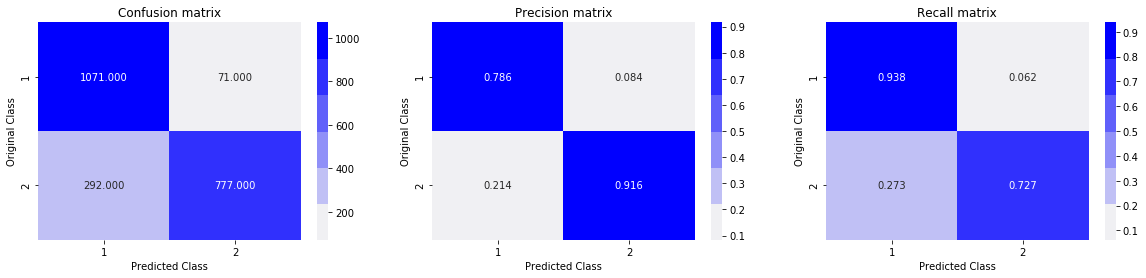

In [95]:
plot_confusion_matrix(test_Y, adc_predict)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [98]:
knn_predict=model_2.predict(test_X)

In [99]:
accuracy_score(knn_predict,test_Y)

0.8208955223880597

In [100]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.83      0.82      0.82      1142
           1       0.81      0.83      0.82      1069

    accuracy                           0.82      2211
   macro avg       0.82      0.82      0.82      2211
weighted avg       0.82      0.82      0.82      2211



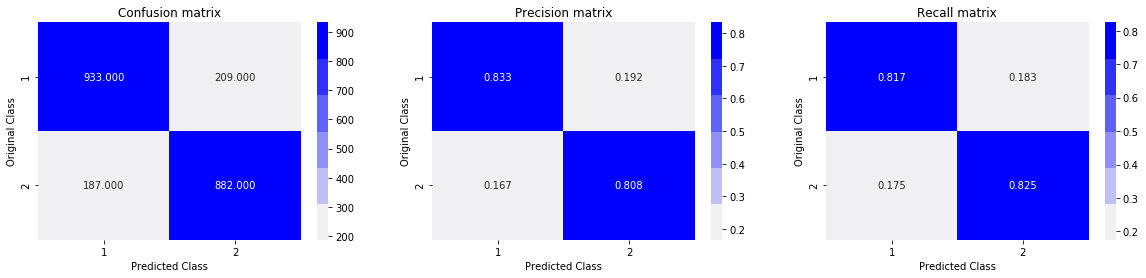

In [101]:
plot_confusion_matrix(test_Y, knn_predict)


In [102]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,test_Y))
print('support Vector Machine Accuracy:',accuracy_score(svm_predict,test_Y))
print('Adaboost Classifier Accuracy:',accuracy_score(adc_predict,test_Y))

Logistic Regression Accuracy: 0.8462234283129806
K-Nearest Neighbour Accuracy: 0.8208955223880597
Decision Tree Classifier Accuracy: 0.8475802804161013
Random Forest Classifier Accuracy: 0.8475802804161013
support Vector Machine Accuracy: 0.8448665762098598
Adaboost Classifier Accuracy: 0.835820895522388
